In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd

# Load the dataset
file_path = "Dataset Heart Disease.csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11  ST slope             1048 non-null   int64  
 12  target               1048 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 106.6 KB


(None,
    Unnamed: 0  age  sex  chest pain type  resting bps  cholesterol  \
 0           0   40    1                2          140        289.0   
 1           1   49    0                3          160        180.0   
 2           2   37    1                2          130        283.0   
 3           3   48    0                4          138        214.0   
 4           4   54    1                3          150        195.0   
 
    fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  \
 0                    0            0             172                0      0.0   
 1                    0            0             156                0      1.0   
 2                    0            1              98                0      0.0   
 3                    0            0             108                1      1.5   
 4                    0            0             122                0      0.0   
 
    ST slope  target  
 0         1       0  
 1         2       1  
 2

In [11]:
from sklearn.preprocessing import StandardScaler

# Drop unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 0", "target"])

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()

# Normalize numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Display cleaned data info
df_scaled_info = df_scaled.describe()

duplicates, df_scaled_info


(0,
                 age           sex  chest pain type   resting bps  \
 count  1.048000e+03  1.048000e+03     1.048000e+03  1.048000e+03   
 mean  -3.661193e-16  4.067993e-17    -1.355998e-16  3.728993e-16   
 std    1.000477e+00  1.000477e+00     1.000477e+00  1.000477e+00   
 min   -2.696101e+00 -1.664267e+00    -1.625725e+00 -2.339582e+00   
 25%   -7.798487e-01 -1.664267e+00    -7.313631e-01 -7.266155e-01   
 50%    7.181882e-02  6.008652e-01     1.629992e-01 -1.505560e-01   
 75%    7.105695e-01  6.008652e-01     1.057362e+00  4.255035e-01   
 max    2.520363e+00  6.008652e-01     1.057362e+00  3.881861e+00   
 
         cholesterol  fasting blood sugar  resting ecg  max heart rate  \
 count  1.048000e+03         1.048000e+03  1048.000000    1.048000e+03   
 mean   1.271248e-16         3.389994e-18     0.000000   -2.711995e-17   
 std    1.000477e+00         1.000477e+00     1.000477    1.000477e+00   
 min   -2.806399e+00        -4.400248e-01    -0.795428   -3.027545e+00   
 25

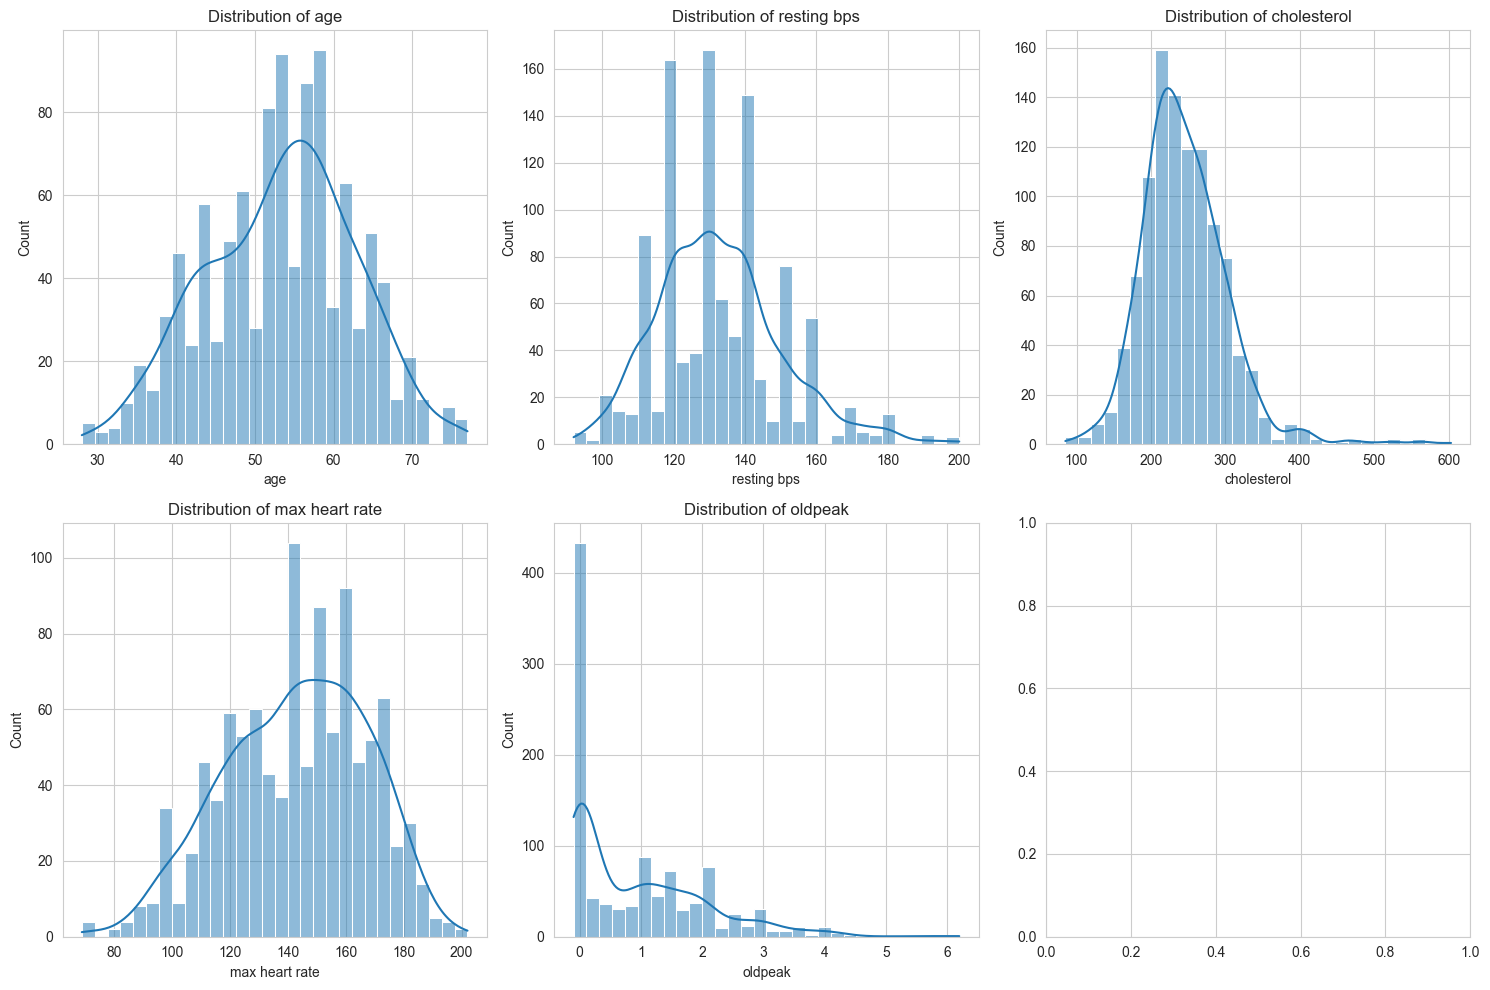

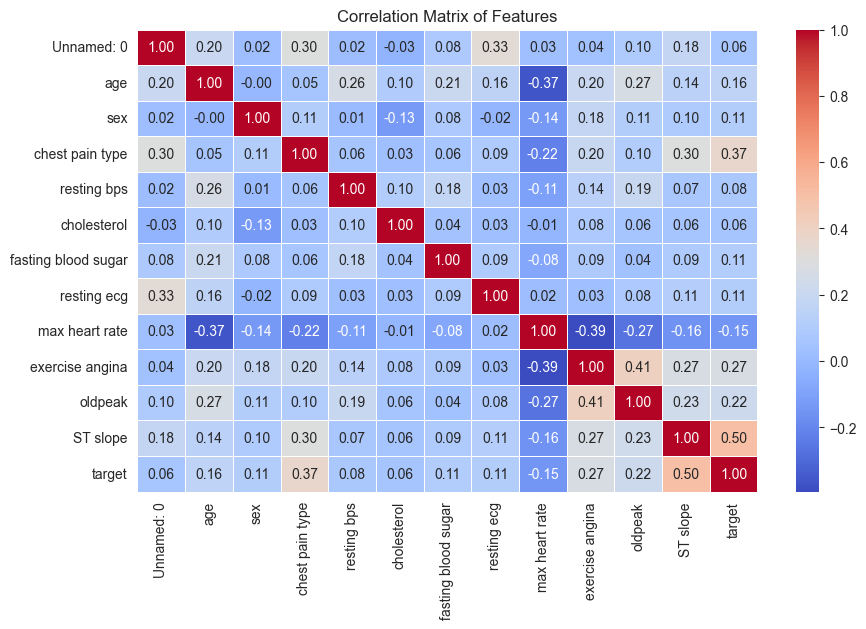

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Select key risk factor columns for distribution plots
risk_factors = ["age", "resting bps", "cholesterol", "max heart rate", "oldpeak"]

# Plot distributions of risk factors
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(risk_factors):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


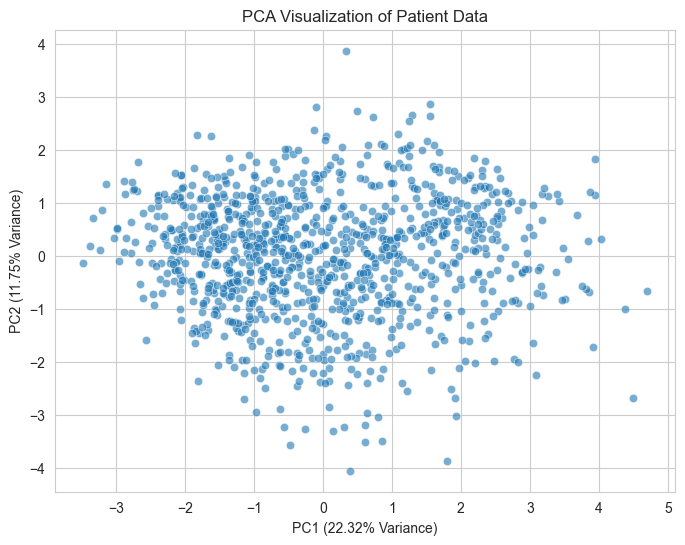

array([0.22317806, 0.11752575])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting relevant features for clustering (excluding 'target' as it's for classification)
features = ["age", "sex", "chest pain type", "resting bps", "cholesterol", "fasting blood sugar",
            "resting ecg", "max heart rate", "exercise angina", "oldpeak", "ST slope"]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reducing to 2D for visualization
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Scatter plot of PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], alpha=0.6)
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}% Variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}% Variance)')
plt.title("PCA Visualization of Patient Data")
plt.show()

# Display explained variance ratio
explained_variance


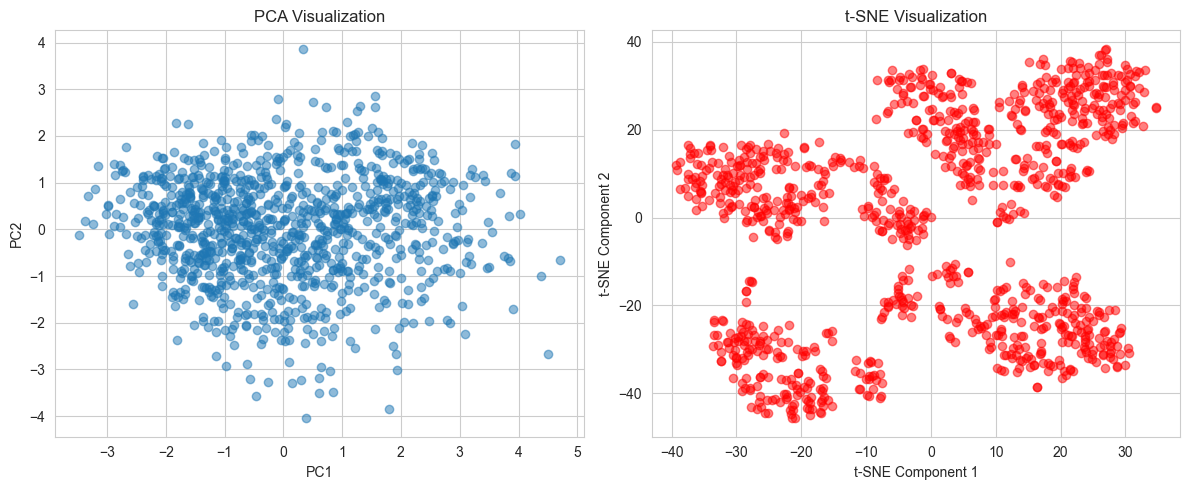

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Apply t-SNE (reduce to 2 components for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(df_scaled)

# Plot PCA and t-SNE results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
axes[0].set_title("PCA Visualization")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

axes[1].scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5, color='red')
axes[1].set_title("t-SNE Visualization")
axes[1].set_xlabel("t-SNE Component 1")
axes[1].set_ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()


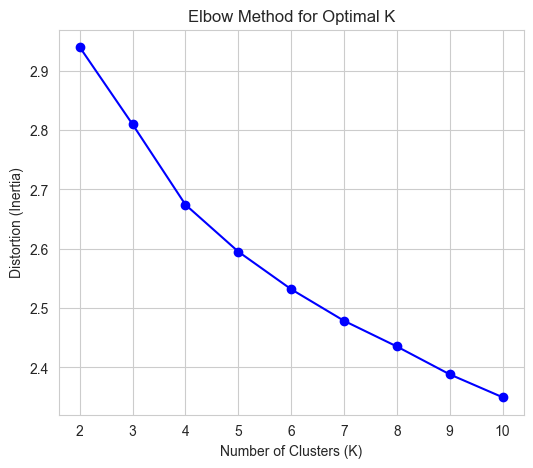

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

# Determine the optimal number of clusters using the Elbow Method
distortions = []
K = range(2, 11)  # Testing clusters from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    distortions.append(sum(np.min(cdist(df_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

# Plot Elbow Method
plt.figure(figsize=(6, 5))
plt.plot(K, distortions, 'bo-', markersize=6)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


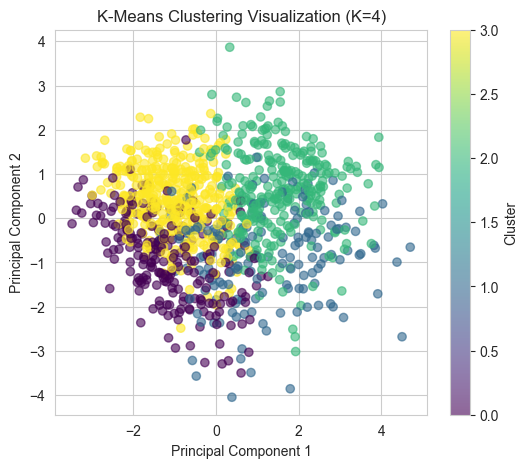

In [19]:
# Reset dataframe to contain only numerical features (excluding any cluster labels from previous runs)
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Apply K-Means clustering again
optimal_k = 4  # Chosen from Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Re-run PCA for visualization
pca_result = pca.fit_transform(df_scaled.drop(columns=['Cluster_KMeans']))

# Visualize K-Means clustering using PCA
plt.figure(figsize=(6, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['Cluster_KMeans'], cmap='viridis', alpha=0.6)
plt.title(f"K-Means Clustering Visualization (K={optimal_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


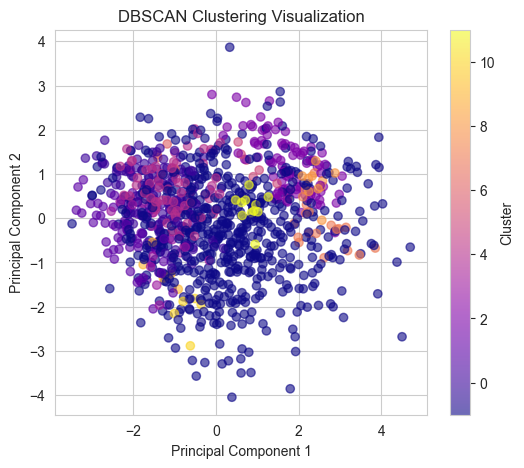

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [20]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering (parameter tuning required)
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Initial parameters; can be tuned further
df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# PCA visualization of DBSCAN clusters
plt.figure(figsize=(6, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['Cluster_DBSCAN'], cmap='plasma', alpha=0.6)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

# Count unique clusters (including noise labeled as -1)
unique_clusters_dbscan = np.unique(df_scaled['Cluster_DBSCAN'])
unique_clusters_dbscan


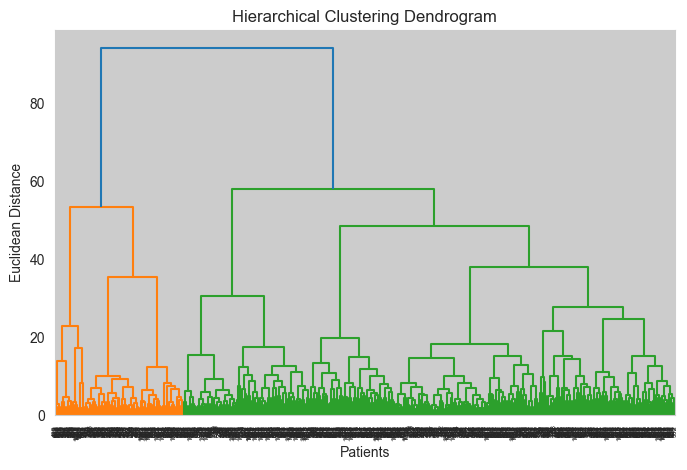

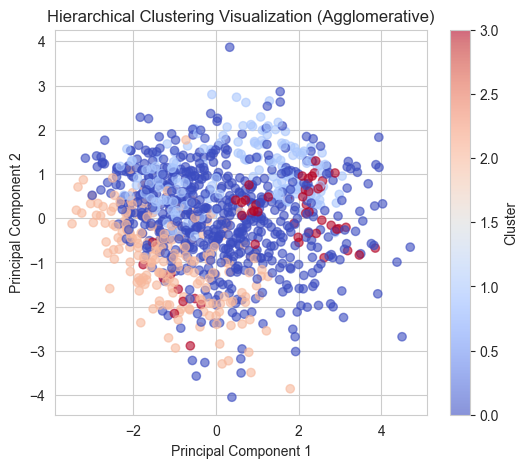

In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Plot dendrogram to determine optimal cluster count
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Patients")
plt.ylabel("Euclidean Distance")
plt.show()

# Apply Agglomerative Clustering (choosing 4 clusters based on dendrogram observation)
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df_scaled['Cluster_Hierarchical'] = hierarchical.fit_predict(df_scaled)

# PCA visualization of Hierarchical Clusters
plt.figure(figsize=(6, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['Cluster_Hierarchical'], cmap='coolwarm', alpha=0.6)
plt.title("Hierarchical Clustering Visualization (Agglomerative)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform

# Compute evaluation metrics for K-Means
silhouette_kmeans = silhouette_score(df_scaled.drop(columns=['Cluster_KMeans']), df_scaled['Cluster_KMeans'])
davies_bouldin_kmeans = davies_bouldin_score(df_scaled.drop(columns=['Cluster_KMeans']), df_scaled['Cluster_KMeans'])

# Compute evaluation metrics for Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
df_scaled['Cluster_Hierarchical'] = hierarchical.fit_predict(df_scaled.drop(columns=['Cluster_KMeans']))

silhouette_hierarchical = silhouette_score(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_Hierarchical']), df_scaled['Cluster_Hierarchical'])
davies_bouldin_hierarchical = davies_bouldin_score(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_Hierarchical']), df_scaled['Cluster_Hierarchical'])

# Compute evaluation metrics for DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_Hierarchical']))

# Check if DBSCAN has valid clusters before computing silhouette score
unique_clusters_dbscan = len(set(df_scaled['Cluster_DBSCAN'])) - (1 if -1 in df_scaled['Cluster_DBSCAN'].values else 0)

if unique_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_Hierarchical', 'Cluster_DBSCAN']), df_scaled['Cluster_DBSCAN'])
    davies_bouldin_dbscan = davies_bouldin_score(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_Hierarchical', 'Cluster_DBSCAN']), df_scaled['Cluster_DBSCAN'])
else:
    silhouette_dbscan = None  # Not enough clusters for silhouette score
    davies_bouldin_dbscan = None

# Create results dataframe
results_df = pd.DataFrame({
    "Clustering Method": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette Score": [silhouette_kmeans, silhouette_hierarchical, silhouette_dbscan],
    "Davies-Bouldin Index": [davies_bouldin_kmeans, davies_bouldin_hierarchical, davies_bouldin_dbscan]
})

# Display evaluation metrics
results_df


,Clustering Method,Silhouette Score,Davies-Bouldin Index
0,K-Means,0.127646,2.337507
1,Hierarchical,0.142661,1.945751
2,DBSCAN,-0.116403,1.902443


In [26]:
# Compute summary statistics for each cluster in K-Means, DBSCAN, and Hierarchical Clustering
cluster_summary = df_scaled.groupby("Cluster_KMeans").mean()

# Reverse scale normalization for interpretability
df_original_scaled = pd.DataFrame(scaler.inverse_transform(df_scaled.drop(columns=['Cluster_KMeans', 'Cluster_DBSCAN', 'Cluster_Hierarchical'])),
                                  columns=df_cleaned.columns)

# Add cluster labels back to the original scale dataset
df_original_scaled["Cluster_KMeans"] = df_scaled["Cluster_KMeans"]
df_original_scaled["Cluster_DBSCAN"] = df_scaled["Cluster_DBSCAN"]
df_original_scaled["Cluster_Hierarchical"] = df_scaled["Cluster_Hierarchical"]

# Compute mean values for each cluster
cluster_characteristics = df_original_scaled.groupby("Cluster_KMeans").mean()

cluster_characteristics


,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,Cluster_DBSCAN,Cluster_Hierarchical
Cluster_KMeans,,,,,,,,,,,,,
0,52.511211,0.000000,2.488789,129.336323,252.008969,0.013453,0.591928,151.587444,0.121076,0.564574,1.340807,0.443946,1.991031
1,58.036585,0.829268,3.000000,140.231707,251.658537,1.000000,0.780488,137.487805,0.481707,1.073171,1.689024,-0.146341,0.402439
2,56.395760,0.904594,3.293286,135.268551,248.017668,0.000000,0.657244,124.639576,0.883392,1.855124,1.848057,0.957597,0.590106
3,49.462963,1.000000,2.576720,129.253968,236.195767,0.007937,0.502646,153.846561,0.079365,0.425132,1.341270,0.309524,0.182540
